C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8918 - loss: 0.3403 - val_accuracy: 0.9856 - val_loss: 0.0463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9861 - loss: 0.0457 - val_accuracy: 0.9883 - val_loss: 0.0375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9896 - loss: 0.0337 - val_accuracy: 0.9909 - val_loss: 0.0284
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9925 - loss: 0.0258 - val_accuracy: 0.9925 - val_loss: 0.0260
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9873 - val_loss: 0.0397
313/313 - 1s - 3ms/step - accuracy: 0.9873 - loss: 0.0397
테스트 정확도: 0.9872999787330627


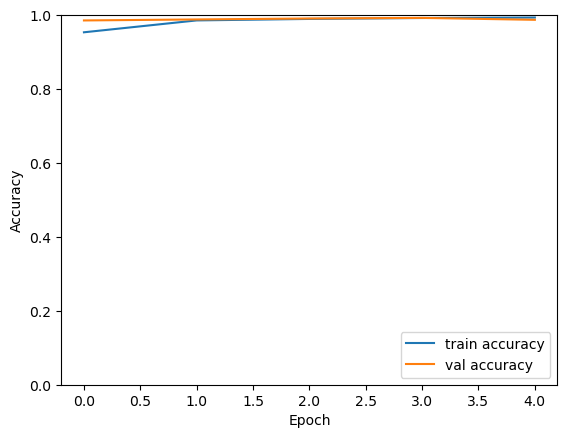

In [1]:
# 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 데이터 전처리: 이미지를 0-1 사이로 정규화
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# CNN 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 분류를 위한 Dense 레이어 추가
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"테스트 정확도: {test_acc}")

# 학습 결과 시각화 (정확도)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import numpy as np

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# VGG16은 3채널의 RGB 이미지(224x224)를 입력으로 받기 때문에 MNIST 이미지 크기를 (28, 28)에서 (224, 224)로 확대하고, 채널을 1 -> 3으로 변환
train_images = np.stack([train_images]*3, axis=-1)
test_images = np.stack([test_images]*3, axis=-1)

train_images = tf.image.resize(train_images, (224, 224))
test_images = tf.image.resize(test_images, (224, 224))

# 이미지 정규화 (0-1 범위로 변환)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 라벨을 One-hot encoding으로 변환
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# VGG16 모델을 불러오되, 사전학습된 가중치(weights='imagenet')를 사용하고, 최상단의 분류 레이어(include_top=False)는 제외
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# VGG16의 기존 가중치가 훈련되지 않도록 고정
vgg_base.trainable = False

# 모델 생성
model = models.Sequential()

# VGG16 사전학습된 베이스 모델 추가
model.add(vgg_base)

# Flatten 레이어 추가
model.add(layers.Flatten())

# Dense 레이어 추가
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # 과적합 방지를 위해 Dropout 추가
model.add(layers.Dense(10, activation='softmax'))  # 출력 레이어: 10개의 클래스 (0~9)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"테스트 정확도: {test_acc}")

# 학습 결과 시각화 (정확도)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


ResourceExhaustedError: {{function_node __wrapped__ResizeBilinear_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[60000,224,224,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:ResizeBilinear] name: 

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
import numpy as np

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# ResNet50은 3채널의 RGB 이미지(224x224)를 입력으로 받기 때문에 MNIST 이미지 크기를 (28, 28)에서 (224, 224)로 확대하고, 채널을 1 -> 3으로 변환
train_images = np.stack([train_images]*3, axis=-1)
test_images = np.stack([test_images]*3, axis=-1)

train_images = tf.image.resize(train_images, (224, 224))
test_images = tf.image.resize(test_images, (224, 224))

# 이미지 정규화 (0-1 범위로 변환)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 라벨을 One-hot encoding으로 변환
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# ResNet50 모델을 불러오되, 사전학습된 가중치(weights='imagenet')를 사용하고, 최상단의 분류 레이어(include_top=False)는 제외
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ResNet50의 기존 가중치가 훈련되지 않도록 고정
resnet_base.trainable = False

# 모델 생성
model = models.Sequential()

# ResNet50 사전학습된 베이스 모델 추가
model.add(resnet_base)

# Flatten 레이어 추가
model.add(layers.Flatten())

# Dense 레이어 추가
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # 과적합 방지를 위해 Dropout 추가
model.add(layers.Dense(10, activation='softmax'))  # 출력 레이어: 10개의 클래스 (0~9)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"테스트 정확도: {test_acc}")

# 학습 결과 시각화 (정확도)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


ResourceExhaustedError: {{function_node __wrapped__ResizeBilinear_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[60000,224,224,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:ResizeBilinear] name: 